In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the green transportation system dataset
df = pd.read_csv('green transportation system.csv')

In [3]:
# Explore the dataset
print("Dataset shape:", df.shape)
print("\nColumn names:")
print(df.columns.tolist())
print("\nDataset info:")
print(df.info())
print("\nFirst 5 rows:")
print(df.head())

Dataset shape: (10000, 5)

Column names:
['energy_efficiency', 'co2_emissions', 'electric_vehicle_penetration', 'cost_efficiency', 'public_transport_usage']

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   energy_efficiency             10000 non-null  float64
 1   co2_emissions                 10000 non-null  float64
 2   electric_vehicle_penetration  10000 non-null  float64
 3   cost_efficiency               10000 non-null  float64
 4   public_transport_usage        10000 non-null  float64
dtypes: float64(5)
memory usage: 390.8 KB
None

First 5 rows:
   energy_efficiency  co2_emissions  electric_vehicle_penetration  \
0          17.490802     106.046123                     46.499916   
1          29.014286      99.936814                     19.225600   
2          24.639879      76.423087    

# Create dataframe

In [4]:
df.head()

,energy_efficiency,co2_emissions,electric_vehicle_penetration,cost_efficiency,public_transport_usage
0,17.490802,106.046123,46.499916,2.095361,27.934722
1,29.014286,99.936814,19.225600,1.648231,15.689067
2,24.639879,76.423087,27.331985,2.911246,17.581553
3,21.973170,141.090001,43.164032,1.047446,20.840268
4,13.120373,121.493624,34.104467,1.969641,22.219200


# Preprocess data

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [6]:
scaler = StandardScaler()
scaler.fit(df)

StandardScaler()

In [7]:
scaled_data = scaler.transform(df)

In [8]:
scaled_data.shape

(10000, 5)

# Apply PCA

In [9]:
pca = PCA(n_components=2)
X_new = pca.fit_transform(scaled_data)

In [10]:
X_new = pca.transform(scaled_data)

In [11]:
X_new.shape

(10000, 2)

# **Visualization**

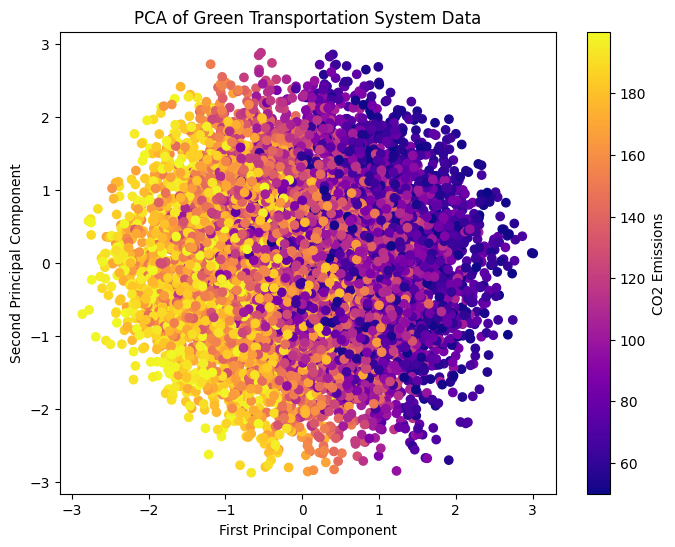

In [12]:
plt.figure(figsize=(8,6))
plt.scatter(X_new[:,0],X_new[:,1], c=df['co2_emissions'], cmap='plasma')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.colorbar(label='CO2 Emissions')
plt.title('PCA of Green Transportation System Data')
plt.show()

# Analyze the PCA Components

In [13]:
pca.explained_variance_ratio_

array([0.20669281, 0.20317681])

In [14]:
pca.explained_variance_ratio_.sum()*100

40.98696223842003

In [15]:
pca.explained_variance_ratio_.cumsum() * 100

array([20.66928086, 40.98696224])

### Try on 5 components

In [16]:
pca = PCA(n_components=5)
X_new = pca.fit_transform(scaled_data)

In [17]:
X_new = pca.transform(scaled_data)

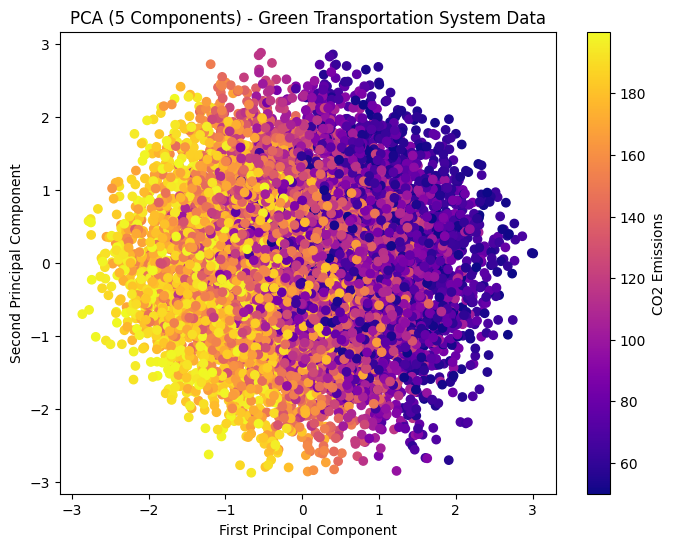

In [18]:
plt.figure(figsize=(8,6))
plt.scatter(X_new[:,0],X_new[:,1], c=df['co2_emissions'], cmap='plasma')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.colorbar(label='CO2 Emissions')
plt.title('PCA (5 Components) - Green Transportation System Data')
plt.show()

In [19]:
X_new.shape

(10000, 5)

In [20]:
pca.explained_variance_ratio_

array([0.20669281, 0.20317681, 0.2012694 , 0.19634014, 0.19252083])

In [21]:
pca.explained_variance_ratio_.cumsum()*100

array([ 20.66928086,  40.98696224,  61.11390229,  80.74791679,
       100.        ])

In [23]:
pca.explained_variance_.sum()*100

500.05000500050005